## Import Library

In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from numpy.linalg import norm
from sklearn.metrics.pairwise import cosine_similarity

## Load Dataset

In [2]:
df_recipes = pd.read_csv('Food Ingredients and Recipe Dataset with Image Name Mapping.csv')
df_numFeature = pd.read_csv('epi_r.csv')

## Exploratory Data Analysis

In [3]:
df_recipes['title_clean'] =df_recipes.Title.str.lower().str.strip()
df_numFeature['title_clean'] =df_numFeature.title.str.lower().str.strip()

In [4]:
df_recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13501 entries, 0 to 13500
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           13501 non-null  int64 
 1   Title                13496 non-null  object
 2   Ingredients          13501 non-null  object
 3   Instructions         13493 non-null  object
 4   Image_Name           13501 non-null  object
 5   Cleaned_Ingredients  13501 non-null  object
 6   title_clean          13496 non-null  object
dtypes: int64(1), object(6)
memory usage: 738.5+ KB


In [5]:
df_numFeature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Columns: 681 entries, title to title_clean
dtypes: float64(679), object(2)
memory usage: 104.2+ MB


In [6]:
df_recipes.head()

,Unnamed: 0,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients,title_clean
0,0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...","Pat chicken dry with paper towels, season all ...",miso-butter-roast-chicken-acorn-squash-panzanella,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...",miso-butter roast chicken with acorn squash pa...
1,1,Crispy Salt and Pepper Potatoes,"['2 large egg whites', '1 pound new potatoes (...",Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger,"['2 large egg whites', '1 pound new potatoes (...",crispy salt and pepper potatoes
2,2,Thanksgiving Mac and Cheese,"['1 cup evaporated milk', '1 cup whole milk', ...",Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams,"['1 cup evaporated milk', '1 cup whole milk', ...",thanksgiving mac and cheese
3,3,Italian Sausage and Bread Stuffing,"['1 (¾- to 1-pound) round Italian loaf, cut in...",Preheat oven to 350°F with rack in middle. Gen...,italian-sausage-and-bread-stuffing-240559,"['1 (¾- to 1-pound) round Italian loaf, cut in...",italian sausage and bread stuffing
4,4,Newton's Law,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",Stir together brown sugar and hot water in a c...,newtons-law-apple-bourbon-cocktail,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",newton's law


In [7]:
df_numFeature.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,title_clean
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"lentil, apple, and turkey wrap"
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,boudin blanc terrine with red onion confit
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,potato and fennel soup hodge
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mahi-mahi in tomato olive sauce
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,spinach noodle casserole


## Preprocessing

### Data Cleaning

In [17]:
df_merged = df_recipes.merge(df_numFeature, on='title_clean', how='inner')

In [18]:
df_merged.head()

,Unnamed: 0,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients,title_clean,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,anise,anniversary,anthony bourdain,aperitif,appetizer,apple,apple juice,apricot,arizona,artichoke,arugula,asian pear,asparagus,aspen,atlanta,australia,avocado,back to school,backyard bbq,bacon,bake,banana,barley,basil,bass,bastille day,bean,beef,beef rib,beef shank,beef tenderloin,beer,beet,bell pepper,berry,beverly hills,birthday,biscuit,bitters,blackberry,blender,blue cheese,blueberry,boil,bok choy,bon appétit,bon app��tit,boston,bourbon,braise,bran,brandy,bread,breadcrumbs,breakfast,brie,brine,brisket,broccoli,broccoli rabe,broil,brooklyn,brown rice,brownie,brunch,brussel sprout,buffalo,buffet,bulgaria,bulgur,burrito,butter,buttermilk,butternut squash,butterscotch/caramel,cabbage,cake,california,calvados,cambridge,campari,camping,canada,candy,candy thermometer,cantaloupe,capers,caraway,cardamom,carrot,cashew,casserole/gratin,cauliflower,caviar,celery,chambord,champagne,chard,chartreuse,cheddar,cheese,cherry,chestnut,chicago,chicken,chickpea,chile,chile pepper,chili,chill,chive,chocolate,christmas,christmas eve,cilantro,cinco de mayo,cinnamon,citrus,clam,clove,cobbler/crumble,cocktail,cocktail party,coconut,cod,coffee,coffee grinder,cognac/armagnac,collard greens,colorado,columbus,condiment,condiment/spread,connecticut,cook like a diner,cookbook critic,cookie,cookies,coriander,corn,cornmeal,costa mesa,cottage cheese,couscous,crab,cranberry,cranberry sauce,cream cheese,créme de cacao,crêpe,cr��me de cacao,cuba,cucumber,cumin,cupcake,currant,curry,custard,dairy,dairy free,dallas,date,deep-fry,denver,dessert,digestif,dill,dinner,dip,diwali,dominican republic,dorie greenspan,double boiler,dried fruit,drink,drinks,duck,easter,eau de vie,edible gift,egg,egg nog,eggplant,egypt,emeril lagasse,endive,engagement party,england,entertaining,epi + ushg,epi loves the microwave,escarole,fall,family reunion,fat free,father's day,fennel,feta,fig,fish,flaming hot summer,flat bread,florida,fontina,food processor,fortified wine,fourth of july,france,frangelico,frankenrecipe,freeze/chill,freezer food,friendsgiving,frittata,fritter,frozen dessert,fruit,fruit juice,fry,game,garlic,georgia,germany,gin,ginger,goat cheese,goose,gouda,gourmet,graduation,grains,grand marnier,granola,grape,grapefruit,grappa,green bean,green onion/scallion,grill,grill/barbecue,ground beef,ground lamb,guam,guava,haiti,halibut,halloween,ham,hamburger,hanukkah,harpercollins,hawaii,hazelnut,healdsburg,healthy,herb,high fiber,hollywood,hominy/cornmeal/masa,honey,honeydew,hors d'oeuvre,horseradish,hot drink,hot pepper,house & garden,house cocktail,houston,hummus,ice cream,ice cream machine,iced coffee,iced tea,idaho,illinois,indiana,iowa,ireland,israel,italy,jalapeño,jam or jelly,jamaica,japan,jerusalem artichoke,juicer,jícama,kahlúa,kale,kansas,kansas city,kentucky,kentucky derby,kid-friendly,kidney friendly,kirsch,kitchen olympics,kiwi,kosher,kosher for passover,kumquat,kwanzaa,labor day,lamb,lamb chop,lamb shank,lancaster,las vegas,lasagna,leafy green,leek,legume,lemon,lemon juice,lemongrass,lentil,lettuce,lima bean,lime,lime juice,lingonberry,liqueur,lobster,london,long beach,los angeles,louisiana,louisville,low cal,low carb,low cholesterol,low fat,low sodium,low sugar,low/no sugar,lunar new year,lunch,lychee,macadamia nut,macaroni and cheese,maine,mandoline,mango,maple syrup,mardi gras,margarita,marinade,marinate,marsala,marscarpone,marshmallow,martini,maryland,massachusetts,mayonnaise,meat,meatball,meatloaf,melon,mexico,mezcal,miami,michigan,microwave,midori,milk/cream,minneapolis,minnesota,mint,mississippi,missouri,mixer,molasses,monterey jack,mortar and pestle,mother's day,mozzarella,muffin,mushroom,mussel,mustard,mustard greens,nancy silverton,nebraska,nectarine,new hampshire,new jersey,new mexic

In [19]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6892 entries, 0 to 6891
Columns: 687 entries, Unnamed: 0 to turkey
dtypes: float64(679), int64(1), object(7)
memory usage: 36.1+ MB


In [20]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [21]:
df_merged.head()

,Unnamed: 0,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients,title_clean,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,anise,anniversary,anthony bourdain,aperitif,appetizer,apple,apple juice,apricot,arizona,artichoke,arugula,asian pear,asparagus,aspen,atlanta,australia,avocado,back to school,backyard bbq,bacon,bake,banana,barley,basil,bass,bastille day,bean,beef,beef rib,beef shank,beef tenderloin,beer,beet,bell pepper,berry,beverly hills,birthday,biscuit,bitters,blackberry,blender,blue cheese,blueberry,boil,bok choy,bon appétit,bon app��tit,boston,bourbon,braise,bran,brandy,bread,breadcrumbs,breakfast,brie,brine,brisket,broccoli,broccoli rabe,broil,brooklyn,brown rice,brownie,brunch,brussel sprout,buffalo,buffet,bulgaria,bulgur,burrito,butter,buttermilk,butternut squash,butterscotch/caramel,cabbage,cake,california,calvados,cambridge,campari,camping,canada,candy,candy thermometer,cantaloupe,capers,caraway,cardamom,carrot,cashew,casserole/gratin,cauliflower,caviar,celery,chambord,champagne,chard,chartreuse,cheddar,cheese,cherry,chestnut,chicago,chicken,chickpea,chile,chile pepper,chili,chill,chive,chocolate,christmas,christmas eve,cilantro,cinco de mayo,cinnamon,citrus,clam,clove,cobbler/crumble,cocktail,cocktail party,coconut,cod,coffee,coffee grinder,cognac/armagnac,collard greens,colorado,columbus,condiment,condiment/spread,connecticut,cook like a diner,cookbook critic,cookie,cookies,coriander,corn,cornmeal,costa mesa,cottage cheese,couscous,crab,cranberry,cranberry sauce,cream cheese,créme de cacao,crêpe,cr��me de cacao,cuba,cucumber,cumin,cupcake,currant,curry,custard,dairy,dairy free,dallas,date,deep-fry,denver,dessert,digestif,dill,dinner,dip,diwali,dominican republic,dorie greenspan,double boiler,dried fruit,drink,drinks,duck,easter,eau de vie,edible gift,egg,egg nog,eggplant,egypt,emeril lagasse,endive,engagement party,england,entertaining,epi + ushg,epi loves the microwave,escarole,fall,family reunion,fat free,father's day,fennel,feta,fig,fish,flaming hot summer,flat bread,florida,fontina,food processor,fortified wine,fourth of july,france,frangelico,frankenrecipe,freeze/chill,freezer food,friendsgiving,frittata,fritter,frozen dessert,fruit,fruit juice,fry,game,garlic,georgia,germany,gin,ginger,goat cheese,goose,gouda,gourmet,graduation,grains,grand marnier,granola,grape,grapefruit,grappa,green bean,green onion/scallion,grill,grill/barbecue,ground beef,ground lamb,guam,guava,haiti,halibut,halloween,ham,hamburger,hanukkah,harpercollins,hawaii,hazelnut,healdsburg,healthy,herb,high fiber,hollywood,hominy/cornmeal/masa,honey,honeydew,hors d'oeuvre,horseradish,hot drink,hot pepper,house & garden,house cocktail,houston,hummus,ice cream,ice cream machine,iced coffee,iced tea,idaho,illinois,indiana,iowa,ireland,israel,italy,jalapeño,jam or jelly,jamaica,japan,jerusalem artichoke,juicer,jícama,kahlúa,kale,kansas,kansas city,kentucky,kentucky derby,kid-friendly,kidney friendly,kirsch,kitchen olympics,kiwi,kosher,kosher for passover,kumquat,kwanzaa,labor day,lamb,lamb chop,lamb shank,lancaster,las vegas,lasagna,leafy green,leek,legume,lemon,lemon juice,lemongrass,lentil,lettuce,lima bean,lime,lime juice,lingonberry,liqueur,lobster,london,long beach,los angeles,louisiana,louisville,low cal,low carb,low cholesterol,low fat,low sodium,low sugar,low/no sugar,lunar new year,lunch,lychee,macadamia nut,macaroni and cheese,maine,mandoline,mango,maple syrup,mardi gras,margarita,marinade,marinate,marsala,marscarpone,marshmallow,martini,maryland,massachusetts,mayonnaise,meat,meatball,meatloaf,melon,mexico,mezcal,miami,michigan,microwave,midori,milk/cream,minneapolis,minnesota,mint,mississippi,missouri,mixer,molasses,monterey jack,mortar and pestle,mother's day,mozzarella,muffin,mushroom,mussel,mustard,mustard greens,nancy silverton,nebraska,nectarine,new hampshire,new jersey,new mexic

In [22]:
df_merged.isnull().sum()

Unnamed: 0                     0
Title                          0
Ingredients                    0
Instructions                   0
Image_Name                     0
Cleaned_Ingredients            0
title_clean                    0
title                          0
rating                         0
calories                    1794
protein                     1815
fat                         1823
sodium                      1794
#cakeweek                      0
#wasteless                     0
22-minute meals                0
3-ingredient recipes           0
30 days of groceries           0
advance prep required          0
alabama                        0
alaska                         0
alcoholic                      0
almond                         0
amaretto                       0
anchovy                        0
anise                          0
anniversary                    0
anthony bourdain               0
aperitif                       0
appetizer                      0
apple     

In [23]:
missing_col = ['calories', 'protein', 'fat', 'sodium']

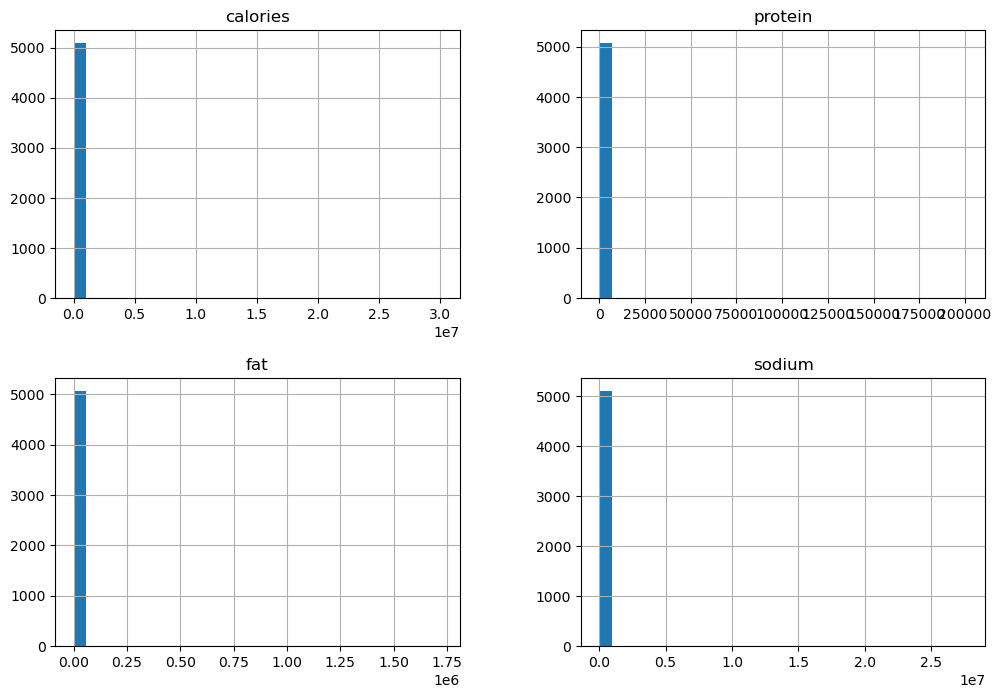

In [24]:
df_merged[missing_col].hist(bins=30, figsize=(12,8))
plt.show()

In [25]:
imputer = SimpleImputer(strategy="median")
df_merged[missing_col] = imputer.fit_transform(df_merged[missing_col])

In [26]:
df_merged[missing_col].isnull().sum()

calories    0
protein     0
fat         0
sodium      0
dtype: int64

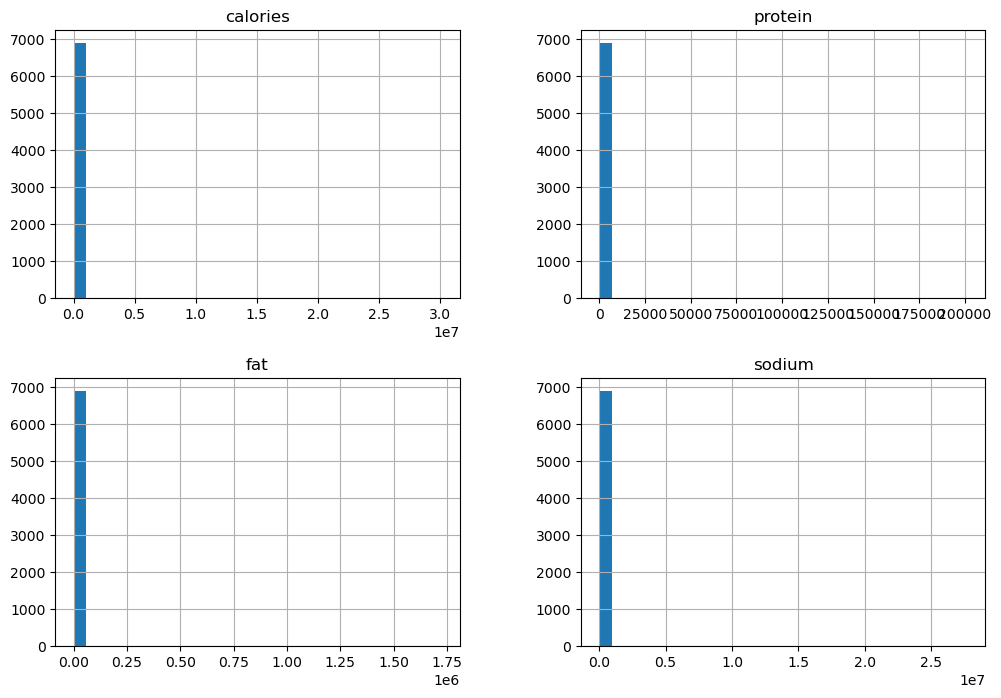

In [27]:
df_merged[missing_col].hist(bins=30, figsize=(12,8))
plt.show()

In [28]:
# df_merged.to_csv('merged_recipes_with_numerical_feature.csv', index=False )

### Feature Engginering

In [29]:
"""
Melakukan penyaringan feature yang sesuai dimana sesuai dengan kriteria sebagai beriut ini :
Nutrition : 
- calories
- protein
- fat
- sodium

Allergens :
1 dairy
2 eggs
3 fish
4 shellfish
5 soy
6 sesame
7 wheat
8 peanuts
9 tree nuts

Dietary Preference :
1. Halal
2. Lactose Intolerance
3. Low Carb
4. Weight Loss
5. Gluten-Free
6. Dairy-Free
7. Spicy
8. No Fried Food

Keterangan :
Halal
Makanan yang diproses dan disiapkan sesuai aturan Islam (tidak mengandung babi, alkohol, dan harus disembelih secara halal).

Lactose Intolerance
Tidak bisa mencerna laktosa, sehingga harus menghindari susu sapi dan produk berbahan susu yang ada laktosa (seperti keju atau yogurt biasa).

Keto / Low Carb
Pola makan yang sangat rendah karbohidrat dan tinggi lemak untuk membantu tubuh membakar lemak sebagai energi.

Weight Loss
Preferensi makanan rendah kalori, rendah gula, atau rendah lemak untuk membantu menurunkan berat badan.

High Protein
Fokus pada makanan tinggi protein seperti ayam, ikan, telur, tahu, dan kacang untuk membantu energi, kenyang lebih lama, atau membangun otot.

Gluten-Free
Menghindari gluten (protein dalam gandum, barley, rye) karena alergi, sensitivitas, atau gangguan pencernaan.

Dairy-Free
Menghindari semua produk susu (baik ada laktosa atau tidak) seperti susu, keju, mentega, yogurt — baik karena alergi maupun preferensi.

Spicy
Menyukai makanan pedas atau berbumbu kuat.

No Fried Food
Menghindari makanan yang digoreng untuk alasan kesehatan atau preferensi rasa (misalnya memilih panggang, kukus, atau rebus).
"""

'\nMelakukan penyaringan feature yang sesuai dimana sesuai dengan kriteria sebagai beriut ini :\nNutrition : \n- calories\n- protein\n- fat\n- sodium\n\nAllergens :\n1 dairy\n2 eggs\n3 fish\n4 shellfish\n5 soy\n6 sesame\n7 wheat\n8 peanuts\n9 tree nuts\n\nDietary Preference :\n1. Halal\n2. Lactose Intolerance\n3. Low Carb\n4. Weight Loss\n5. Gluten-Free\n6. Dairy-Free\n7. Spicy\n8. No Fried Food\n\nKeterangan :\nHalal\nMakanan yang diproses dan disiapkan sesuai aturan Islam (tidak mengandung babi, alkohol, dan harus disembelih secara halal).\n\nLactose Intolerance\nTidak bisa mencerna laktosa, sehingga harus menghindari susu sapi dan produk berbahan susu yang ada laktosa (seperti keju atau yogurt biasa).\n\nKeto / Low Carb\nPola makan yang sangat rendah karbohidrat dan tinggi lemak untuk membantu tubuh membakar lemak sebagai energi.\n\nWeight Loss\nPreferensi makanan rendah kalori, rendah gula, atau rendah lemak untuk membantu menurunkan berat badan.\n\nHigh Protein\nFokus pada makanan

In [30]:
df_merged["halal"] = (
    (df_merged["pork"]==0) &
    (df_merged["pork chop"]==0) &
    (df_merged["pork rib"]==0) &
    (df_merged["pork tenderloin"]==0) &
    (df_merged["bacon"]==0) &
    (df_merged["ham"]==0) &
    (df_merged["prosciutto"]==0) &
    (df_merged["sausage"]==0) &
    (df_merged["alcoholic"]==0) &
    (df_merged["beer"]==0) &
    (df_merged["wine"]==0) &
    (df_merged["white wine"]==0) &
    (df_merged["red wine"]==0) &
    (df_merged["sparkling wine"]==0) &
    (df_merged["champagne"]==0) &
    (df_merged["spirit"]==0) &
    (df_merged["whiskey"]==0) &
    (df_merged["vodka"]==0) &
    (df_merged["rum"]==0) &
    (df_merged["gin"]==0) &
    (df_merged["bourbon"]==0) &
    (df_merged["scotch"]==0) &
    (df_merged["tequila"]==0) &
    (df_merged["mezcal"]==0) &
    (df_merged["liqueur"]==0) &
    (df_merged["fortified wine"]==0) &
    (df_merged["brandy"]==0) &
    (df_merged["cognac/armagnac"]==0) &
    (df_merged["marsala"]==0) & 
    (df_merged["vermouth"]==0) & 
    (df_merged["sherry"]==0) & 
    (df_merged["port"]==0) & 
    (df_merged["kirsch"]==0)
    
).astype(int)

In [31]:
df_merged["is_lactose_free"] = (
    # Fitur Produk Susu dan Lemak Susu
    (df_merged["dairy"]==0) &
    (df_merged["milk/cream"]==0) &
    (df_merged["butter"]==0) &
    (df_merged["buttermilk"]==0) &
    (df_merged["yogurt"]==0) &
    (df_merged["sour cream"]==0) &
    (df_merged["ice cream"]==0) &
    (df_merged["cottage cheese"]==0) &
    (df_merged["cream cheese"]==0) &
    (df_merged["ricotta"]==0) &
    (df_merged["marscarpone"]==0) &
    
    # Fitur Keju
    (df_merged["cheese"]==0) &
    (df_merged["cheddar"]==0) &
    (df_merged["brie"]==0) &
    (df_merged["feta"]==0) &
    (df_merged["fontina"]==0) &
    (df_merged["goat cheese"]==0) &
    (df_merged["gouda"]==0) &
    (df_merged["monterey jack"]==0) &
    (df_merged["mozzarella"]==0) &
    (df_merged["parmesan"]==0) &
    (df_merged["swiss cheese"]==0) &
    (df_merged["blue cheese"]==0) &
    
    # Tambahan, meskipun sering tidak mengandung laktosa, ini penting dihindari
    (df_merged["egg nog"]==0)
    
).astype(int)

In [32]:
df_merged["is_spicy"] = (
    # Cabai dan Turunannya (Sumber utama pedas)
    (df_merged["chile"]==1) |
    (df_merged["chile pepper"]==1) |
    (df_merged["chili"]==1) |
    (df_merged["jalapeño"]==1) |
    (df_merged["poblano"]==1) |
    (df_merged["hot pepper"]==1) |
    
    # Rempah dan Bumbu Pedas
    (df_merged["ginger"]==1) |
    (df_merged["wasabi"]==1) |
    (df_merged["curry"]==1) |
    (df_merged["mustard"]==1)
    
).astype(int)

In [33]:
df_merged["is_not_fried"] = (
    # Resep harus TIDAK mengandung (==0) setiap tag penggorengan
    (df_merged["fry"]==0) &
    (df_merged["deep-fry"]==0) &
    (df_merged["pan-fry"]==0)&
    
    # Kita juga bisa mempertimbangkan untuk mengecualikan 'fritter',
    # karena fritter biasanya digoreng.
    (df_merged["fritter"]==0) 
    
).astype(int)

In [34]:
df_merged["weight_loss"] = (
    (df_merged["healthy"]==1) |
    (df_merged["low cal"]==1) |
    (df_merged["low fat"]==1) |
    (df_merged["low sugar"]==1) |
    (df_merged["low/no sugar"]==1) |
    (df_merged["fat free"]==1) |
    (df_merged["high fiber"]==1)
).astype(int)

In [35]:
protein_median = df_merged["protein"].median()
df_merged["high_protein"] = (df_merged["protein"] > protein_median).astype(int)

In [36]:
df_merged["gluten_free"] = df_merged["wheat/gluten-free"]

In [37]:
df_merged.head()

,Unnamed: 0,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients,title_clean,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,anise,anniversary,anthony bourdain,aperitif,appetizer,apple,apple juice,apricot,arizona,artichoke,arugula,asian pear,asparagus,aspen,atlanta,australia,avocado,back to school,backyard bbq,bacon,bake,banana,barley,basil,bass,bastille day,bean,beef,beef rib,beef shank,beef tenderloin,beer,beet,bell pepper,berry,beverly hills,birthday,biscuit,bitters,blackberry,blender,blue cheese,blueberry,boil,bok choy,bon appétit,bon app��tit,boston,bourbon,braise,bran,brandy,bread,breadcrumbs,breakfast,brie,brine,brisket,broccoli,broccoli rabe,broil,brooklyn,brown rice,brownie,brunch,brussel sprout,buffalo,buffet,bulgaria,bulgur,burrito,butter,buttermilk,butternut squash,butterscotch/caramel,cabbage,cake,california,calvados,cambridge,campari,camping,canada,candy,candy thermometer,cantaloupe,capers,caraway,cardamom,carrot,cashew,casserole/gratin,cauliflower,caviar,celery,chambord,champagne,chard,chartreuse,cheddar,cheese,cherry,chestnut,chicago,chicken,chickpea,chile,chile pepper,chili,chill,chive,chocolate,christmas,christmas eve,cilantro,cinco de mayo,cinnamon,citrus,clam,clove,cobbler/crumble,cocktail,cocktail party,coconut,cod,coffee,coffee grinder,cognac/armagnac,collard greens,colorado,columbus,condiment,condiment/spread,connecticut,cook like a diner,cookbook critic,cookie,cookies,coriander,corn,cornmeal,costa mesa,cottage cheese,couscous,crab,cranberry,cranberry sauce,cream cheese,créme de cacao,crêpe,cr��me de cacao,cuba,cucumber,cumin,cupcake,currant,curry,custard,dairy,dairy free,dallas,date,deep-fry,denver,dessert,digestif,dill,dinner,dip,diwali,dominican republic,dorie greenspan,double boiler,dried fruit,drink,drinks,duck,easter,eau de vie,edible gift,egg,egg nog,eggplant,egypt,emeril lagasse,endive,engagement party,england,entertaining,epi + ushg,epi loves the microwave,escarole,fall,family reunion,fat free,father's day,fennel,feta,fig,fish,flaming hot summer,flat bread,florida,fontina,food processor,fortified wine,fourth of july,france,frangelico,frankenrecipe,freeze/chill,freezer food,friendsgiving,frittata,fritter,frozen dessert,fruit,fruit juice,fry,game,garlic,georgia,germany,gin,ginger,goat cheese,goose,gouda,gourmet,graduation,grains,grand marnier,granola,grape,grapefruit,grappa,green bean,green onion/scallion,grill,grill/barbecue,ground beef,ground lamb,guam,guava,haiti,halibut,halloween,ham,hamburger,hanukkah,harpercollins,hawaii,hazelnut,healdsburg,healthy,herb,high fiber,hollywood,hominy/cornmeal/masa,honey,honeydew,hors d'oeuvre,horseradish,hot drink,hot pepper,house & garden,house cocktail,houston,hummus,ice cream,ice cream machine,iced coffee,iced tea,idaho,illinois,indiana,iowa,ireland,israel,italy,jalapeño,jam or jelly,jamaica,japan,jerusalem artichoke,juicer,jícama,kahlúa,kale,kansas,kansas city,kentucky,kentucky derby,kid-friendly,kidney friendly,kirsch,kitchen olympics,kiwi,kosher,kosher for passover,kumquat,kwanzaa,labor day,lamb,lamb chop,lamb shank,lancaster,las vegas,lasagna,leafy green,leek,legume,lemon,lemon juice,lemongrass,lentil,lettuce,lima bean,lime,lime juice,lingonberry,liqueur,lobster,london,long beach,los angeles,louisiana,louisville,low cal,low carb,low cholesterol,low fat,low sodium,low sugar,low/no sugar,lunar new year,lunch,lychee,macadamia nut,macaroni and cheese,maine,mandoline,mango,maple syrup,mardi gras,margarita,marinade,marinate,marsala,marscarpone,marshmallow,martini,maryland,massachusetts,mayonnaise,meat,meatball,meatloaf,melon,mexico,mezcal,miami,michigan,microwave,midori,milk/cream,minneapolis,minnesota,mint,mississippi,missouri,mixer,molasses,monterey jack,mortar and pestle,mother's day,mozzarella,muffin,mushroom,mussel,mustard,mustard greens,nancy silverton,nebraska,nectarine,new hampshire,new jersey,new mexic

In [38]:
final_features = [
    # Nutrition
    "calories", "protein", "fat", "sodium",
    
    # Allergens
    "dairy", "egg", "fish", "shellfish", "soy", "sesame",
    "whole wheat", "peanut", "tree nut",

    # Dietary Preferences
    "halal", "is_lactose_free", "low carb", "weight_loss",
    "high_protein", "gluten_free", "dairy free",
    "is_spicy", "is_not_fried"
]


### Data Transformation

In [39]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_merged[final_features])

In [ ]:
pca = PCA(n_components=10, random_state=42)
X_pca = pca.fit_transform(X_scaled)

## Modeling

### Find Best K Value

In [41]:
best_k = None
best_score = -1

for k in range(3, 15):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    print(f"k={k}, silhouette={score}")

    if score > best_score:
        best_score = score
        best_k = k

print("Best k =", best_k, "with silhouette =", best_score)


k=3, silhouette=0.18443457912977304
k=4, silhouette=0.1849910167319704
k=5, silhouette=0.1905517154698693
k=6, silhouette=0.2178024731969645
k=7, silhouette=0.2456896467931177
k=8, silhouette=0.22806683983595466
k=9, silhouette=0.23954924047293064
k=10, silhouette=0.24703925894093995
k=11, silhouette=0.2619632210694272
k=12, silhouette=0.2711233355637789
k=13, silhouette=0.3164303686215435
k=14, silhouette=0.3213129657273102
Best k = 14 with silhouette = 0.3213129657273102


### Training With KMeans

In [42]:
final_kmeans = KMeans(n_clusters=best_k, random_state=42)
df_merged["cluster"] = final_kmeans.fit_predict(X_pca)


## Evaluation

### Evaluation Metrics

In [43]:
silhouette = silhouette_score(X_pca, df_merged["cluster"])
ch = calinski_harabasz_score(X_pca, df_merged["cluster"])
db = davies_bouldin_score(X_pca, df_merged["cluster"])

print("Silhouette:", silhouette)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)


Silhouette: 0.3213129657273102
Calinski-Harabasz: 2261.493625108906
Davies-Bouldin: 0.8743775016363357


### Visualization Cluster

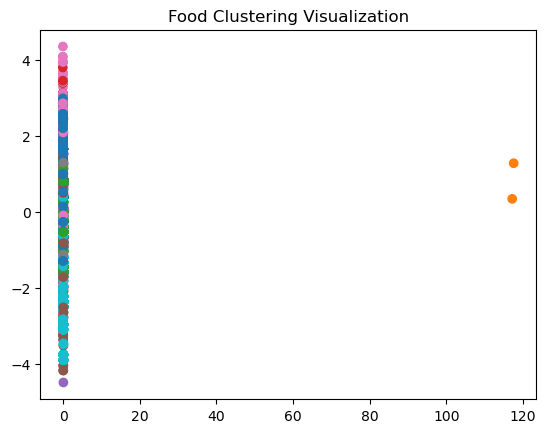

In [44]:
pca_2 = PCA(n_components=2)
vis = pca_2.fit_transform(X_scaled)

plt.scatter(vis[:,0], vis[:,1], c=df_merged["cluster"], cmap="tab10")
plt.title("Food Clustering Visualization")
plt.show()


In [45]:
def visualize_clusters(df, X_pca, kmeans_model, figsize=(16,12)):
    """
    Membuat 4 visualisasi cluster untuk dataset food recommendation.
    
    - PCA Scatter Plot (PC1 vs PC2)
    - Cluster Size Distribution
    - Average Protein per Cluster
    - Average Calories per Cluster
    """

    cluster_labels = df["cluster"].values
    OPTIMAL_K = len(df["cluster"].unique())

    print(f"\nCreating cluster visualizations... (K={OPTIMAL_K})")

    # Convert X_pca to DataFrame for indexing clarity
    X_pca_df = pd.DataFrame(X_pca, index=df.index)

    fig, axes = plt.subplots(2, 2, figsize=figsize)
    fig.suptitle(f'Food Clustering Analysis (K={OPTIMAL_K})', fontsize=18)

    # ────────────────────────────────────────────
    # Plot 1 — PCA Scatter (PC1 vs PC2)
    # ────────────────────────────────────────────
    scatter = axes[0, 0].scatter(
        X_pca_df.iloc[:, 0], 
        X_pca_df.iloc[:, 1], 
        c=cluster_labels, cmap='viridis', 
        alpha=0.65, s=45
    )
    axes[0, 0].set_xlabel('PC1')
    axes[0, 0].set_ylabel('PC2')
    axes[0, 0].set_title('Clusters in PCA Space (PC1 vs PC2)')

    # Optional: plot centroids  
    # Convert centroid PCA back to real PCA components
    centroids_pca_2d = kmeans_model.cluster_centers_[:, :2]
    axes[0, 0].scatter(
        centroids_pca_2d[:,0], centroids_pca_2d[:,1],
        marker='X', s=180, color='red', label='Centroids'
    )
    axes[0, 0].legend()

    plt.colorbar(scatter, ax=axes[0, 0], label='Cluster')


    # ────────────────────────────────────────────
    # Plot 2 — Cluster Size Distribution
    # ────────────────────────────────────────────
    cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
    axes[0, 1].bar(
        cluster_counts.index,
        cluster_counts.values,
        color=plt.cm.tab10(range(OPTIMAL_K)),
        edgecolor='black'
    )
    axes[0, 1].set_title("Cluster Size Distribution")
    axes[0, 1].set_xlabel("Cluster ID")
    axes[0, 1].set_ylabel("Number of Recipes")
    axes[0, 1].grid(axis='y', alpha=0.3)


    # ────────────────────────────────────────────
    # Plot 3 — Average Protein per Cluster
    # ────────────────────────────────────────────
    avg_protein = df.groupby("cluster")["protein"].mean()
    axes[1, 0].bar(
        avg_protein.index,
        avg_protein.values,
        color="mediumseagreen",
        edgecolor='black'
    )
    axes[1, 0].set_title("Average Protein per Cluster")
    axes[1, 0].set_xlabel("Cluster ID")
    axes[1, 0].set_ylabel("Protein (grams)")
    axes[1, 0].grid(axis='y', alpha=0.3)


    # ────────────────────────────────────────────
    # Plot 4 — Average Calories per Cluster
    # ────────────────────────────────────────────
    avg_cal = df.groupby("cluster")["calories"].mean()
    axes[1, 1].bar(
        avg_cal.index,
        avg_cal.values,
        color="coral",
        edgecolor='black'
    )
    axes[1, 1].set_title("Average Calories per Cluster")
    axes[1, 1].set_xlabel("Cluster ID")
    axes[1, 1].set_ylabel("Calories")
    axes[1, 1].grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()



Creating cluster visualizations... (K=14)


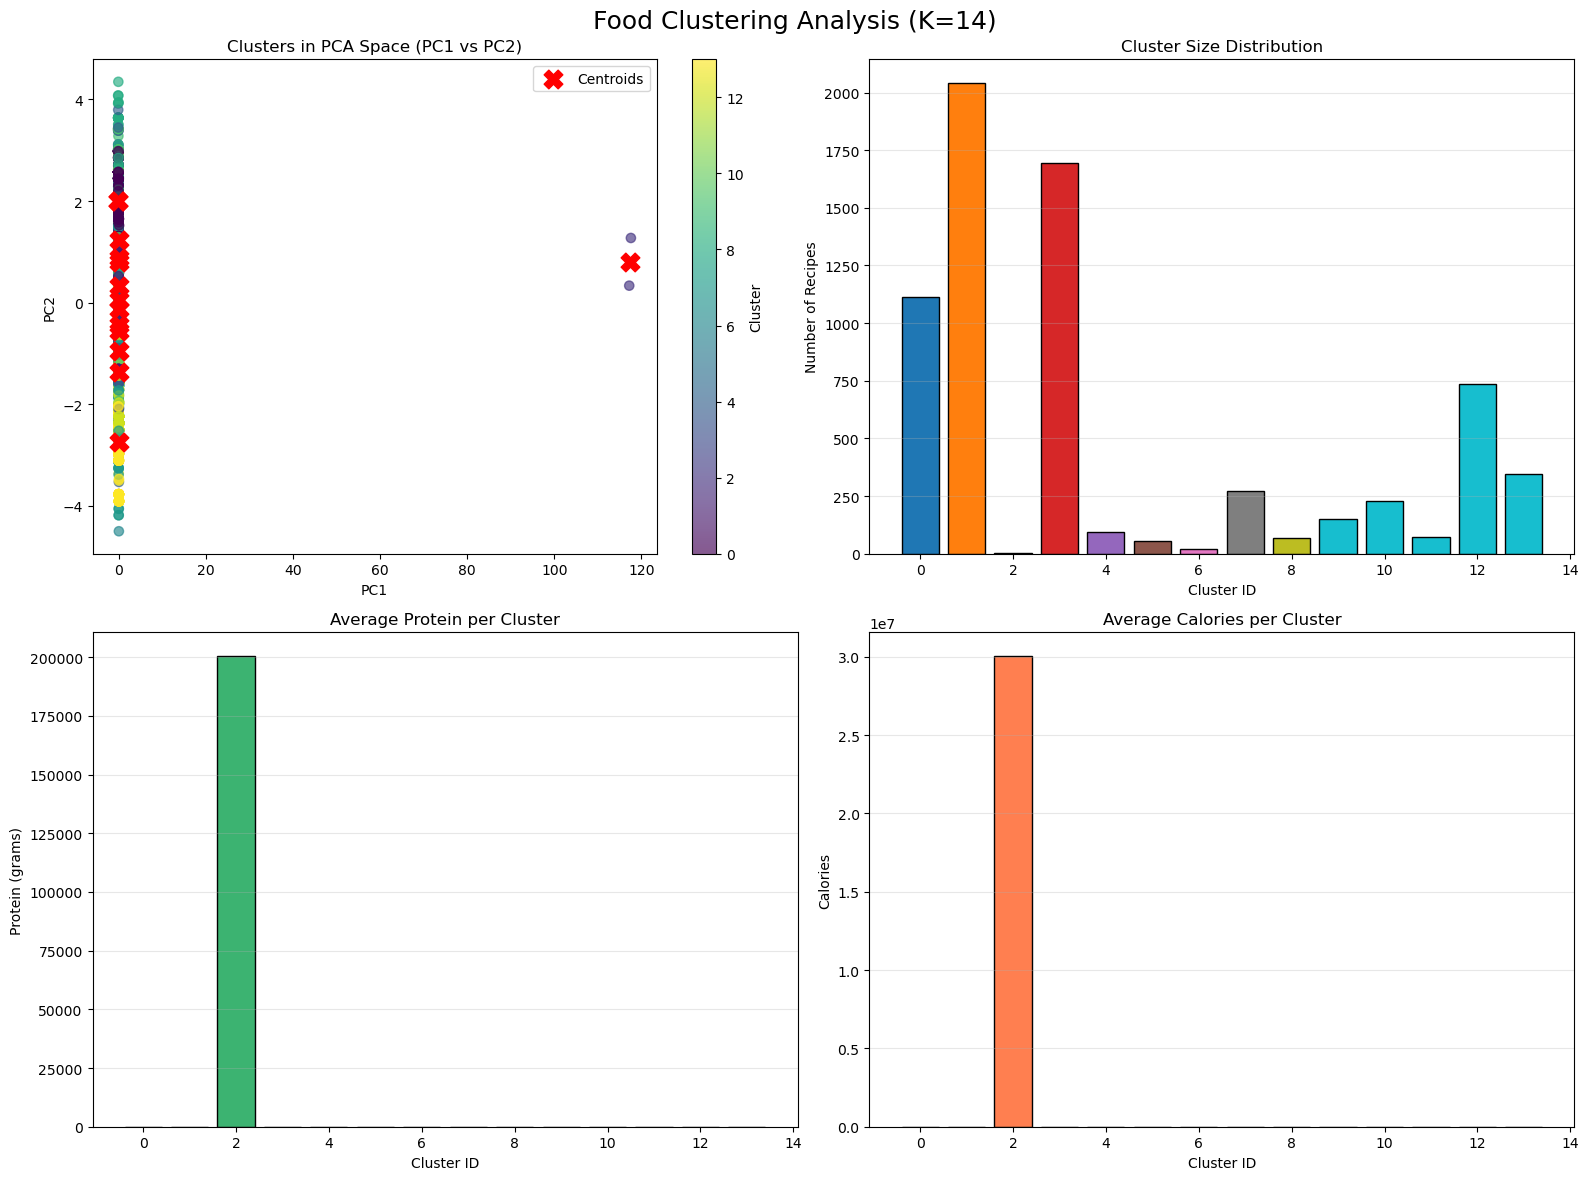

In [46]:
visualize_clusters(df_merged, X_pca, final_kmeans)

In [47]:
print(df_merged.head())

   Unnamed: 0                               Title  \
0           3  Italian Sausage and Bread Stuffing   
1           3  Italian Sausage and Bread Stuffing   
2          12     Butternut Squash and Apple Soup   
3          31                       Shrimp Creole   
4          31                       Shrimp Creole   

                                         Ingredients  \
0  ['1 (¾- to 1-pound) round Italian loaf, cut in...   
1  ['1 (¾- to 1-pound) round Italian loaf, cut in...   
2  ['6 slices bacon, cut crosswise into ½-inch pi...   
3  ['3 garlic cloves, minced', '2 large onions, c...   
4  ['3 garlic cloves, minced', '2 large onions, c...   

                                        Instructions  \
0  Preheat oven to 350°F with rack in middle. Gen...   
1  Preheat oven to 350°F with rack in middle. Gen...   
2  Cook bacon in a 6-quart heavy pot over medium ...   
3  In a large heavy kettle cook garlic, onions, c...   
4  In a large heavy kettle cook garlic, onions, c...   

       

## Testing

##### Berdasarkan cluster dan cosine similiarity

In [48]:
def recommend_food(recipe_id, df, X_pca, top_k=10):
    """
    Menghasilkan rekomendasi makanan berdasarkan:
    - cluster yang sama
    - cosine similarity pada PCA vector
    """
    
    # Ambil cluster dari makanan yang dipilih user
    target_cluster = df.loc[recipe_id, "cluster"]
    
    # Ambil semua makanan dalam cluster tersebut
    cluster_indices = df[df["cluster"] == target_cluster].index.tolist()
    
    # Ambil vector PCA makanan target
    target_vec = X_pca[recipe_id].reshape(1, -1)
    
    # Ambil vector PCA seluruh makanan dalam cluster
    cluster_vecs = X_pca[cluster_indices]
    
    # Hitung cosine similarity
    sims = cosine_similarity(target_vec, cluster_vecs)[0]
    
    # Buat dataframe ranking
    results = pd.DataFrame({
        "index": cluster_indices,
        "similarity": sims
    }).sort_values(by="similarity", ascending=False)
    
    # Hilangkan diri sendiri dari rekomendasi
    results = results[results["index"] != recipe_id]
    
    # Ambil top-K
    top_results = results.head(top_k)
    
    # Gabungkan dengan informasi makanan
    recommendations = df.loc[top_results["index"], ["Title", "Image_Name"]].copy()
    recommendations["similarity"] = top_results["similarity"].values
    
    return recommendations.reset_index(drop=True)


##### Berdasarkan distance ke centroid K-Means

In [49]:
def recommend_by_centroid(recipe_id, df, X_pca, kmeans, top_k=10):
    """
    Rekomendasi berdasarkan jarak ke centroid cluster.
    """
    
    # Cluster target
    target_cluster = df.loc[recipe_id, "cluster"]
    
    # Centroid PCA dari cluster ini
    centroid = kmeans.cluster_centers_[target_cluster]
    
    # Ambil index anggota cluster
    cluster_indices = df[df["cluster"] == target_cluster].index.tolist()
    
    # Hitung distance untuk tiap item terhadap centroid
    distances = []
    for idx in cluster_indices:
        vec = X_pca[idx]
        d = norm(vec - centroid)
        distances.append((idx, d))
    
    # Urutkan dari yang PALING DEKAT
    distances = sorted(distances, key=lambda x: x[1])
    
    # Hilangkan diri sendiri
    distances = [item for item in distances if item[0] != recipe_id]
    
    # Ambil top-K
    top_ids = distances[:top_k]
    
    recommendations = df.loc[[i[0] for i in top_ids], ["Title", "Image_Name"]].copy()
    recommendations["distance"] = [i[1] for i in top_ids]
    
    return recommendations.reset_index(drop=True)


In [50]:
print("Target : ",df_merged['Title'].loc[120])

Target :  Artichokes Braised in Lemon and Olive Oil


In [51]:
# Berdasarkan pada cluster jadi nantinya yang dipakai adalah rec1
rec1 = recommend_food(120, df_merged, X_pca, top_k=10)
print(rec1)

rec2 = recommend_by_centroid(120, df_merged, X_pca, final_kmeans, top_k=10)
print(rec2)


                                               Title  \
0            Butternut Squash with Shallots and Sage   
1      Cucumber and Raisin Relish with Mustard Seeds   
2                         White Balsamic-Jicama Slaw   
3                        Celery-Root and Pecan Salad   
4                              Grilled Herb Potatoes   
5  Cuban Avocado, Watercress, and Pineapple Salad...   
6                               Honey Almond Granola   
7                       Swiss Chard with Horseradish   
8                       Swiss Chard with Horseradish   
9                               Warmed Spiced Olives   

                                          Image_Name  similarity  
0     butternut-squash-with-shallots-and-sage-232812         1.0  
1      cucumber-and-raisin-relish-with-mustard-seeds         1.0  
2                  white-balsamic-jicama-slaw-358170         1.0  
3                 celery-root-and-pecan-salad-237204         1.0  
4                       grilled-herb-potatoes-35

In [52]:
# import pickle

# pickle.dump(scaler, open("scaler.pkl", "wb"))
# pickle.dump(pca, open("pca.pkl", "wb"))
# pickle.dump(final_kmeans, open("kmeans.pkl", "wb"))

In [53]:
# df_merged.to_csv('Final_Model_With_Clustering.csv', index=False)